In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from functions.plotting import *
from functions.filtering import *

In [2]:
# load data from steinmetz dir
alldat = np.load('../steinmetz/steinmetz_part0.npz', allow_pickle=True)['dat']
alldat = np.hstack((alldat, np.load('../steinmetz/steinmetz_part1.npz', allow_pickle=True)['dat']))
alldat = np.hstack((alldat, np.load('../steinmetz/steinmetz_part2.npz', allow_pickle=True)['dat']))

In [3]:
cr_top10 = ["ZI", "APN", "MRN", "SCm", "PO", "LD", "SNr", "SSp", "MOp", "MOs"]
cr_others = ["SCs", "MG", "VPM", "VPL", "MD","CP", "PL", "ACA", "RSP", "VISam"]

In [4]:
# get neurons count for all regions
all_rs = np.hstack([cr_top10, cr_others])
neuron_count = []
for region in all_rs:
    region_neurons = []
    for dat in alldat:
        neurons = dat['brain_area'] == region
        neurons_spks = dat['spks'][neurons]
        neurons_count = neurons_spks.shape[0]
        total_neurons_count = dat['spks'].shape[0]
        trials_count = dat['spks'].shape[1]
#         print(f"{region} neurons: {neurons_count}")
#         print(f"trials: {trials_count}")
        region_neurons.append(total_neurons_count)
    neuron_count.append(np.asarray(region_neurons))
neuron_count = np.asarray(neuron_count)

In [5]:
sorted(list(zip(all_rs, neuron_count.sum(0))))

[('ACA', 21780),
 ('APN', 21400),
 ('CP', 9480),
 ('LD', 23380),
 ('MD', 14860),
 ('MG', 13960),
 ('MOp', 15760),
 ('MOs', 23440),
 ('MRN', 12380),
 ('PL', 11300),
 ('PO', 21540),
 ('RSP', 12120),
 ('SCm', 35380),
 ('SCs', 17140),
 ('SNr', 11680),
 ('SSp', 23120),
 ('VISam', 17980),
 ('VPL', 15120),
 ('VPM', 19660),
 ('ZI', 14680)]

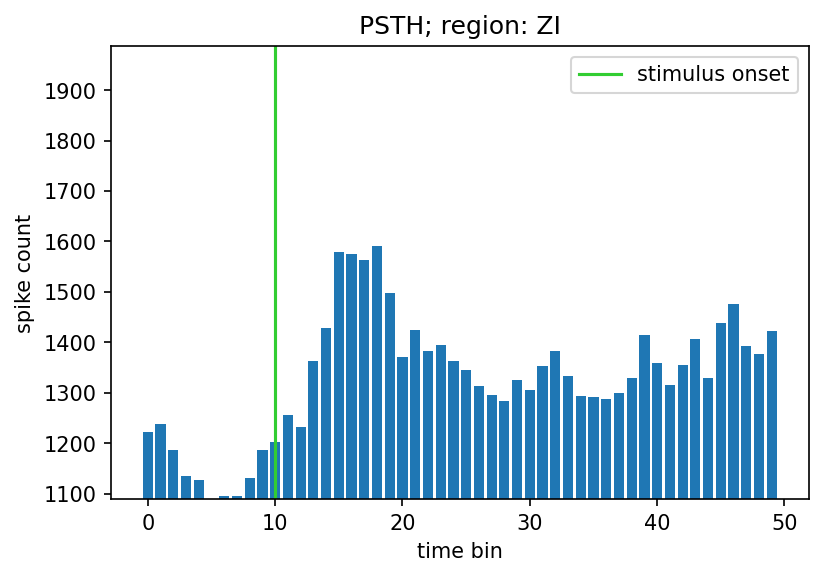

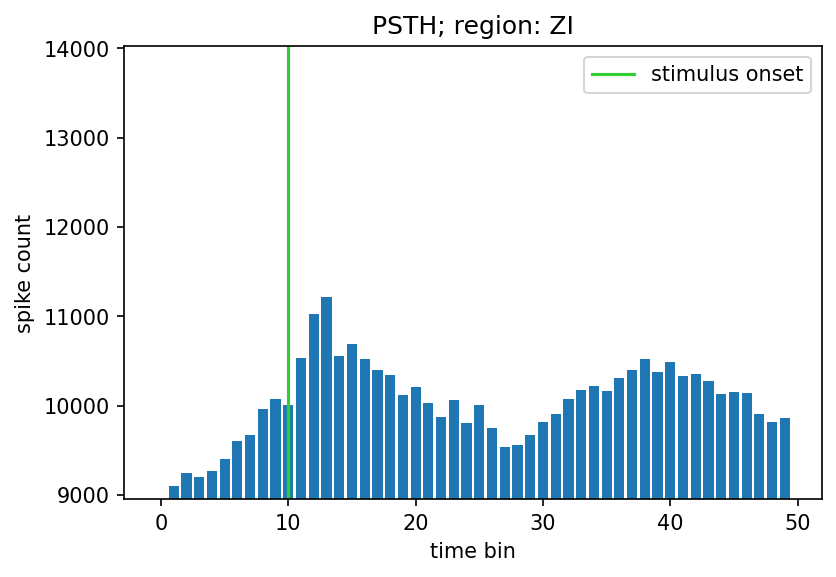

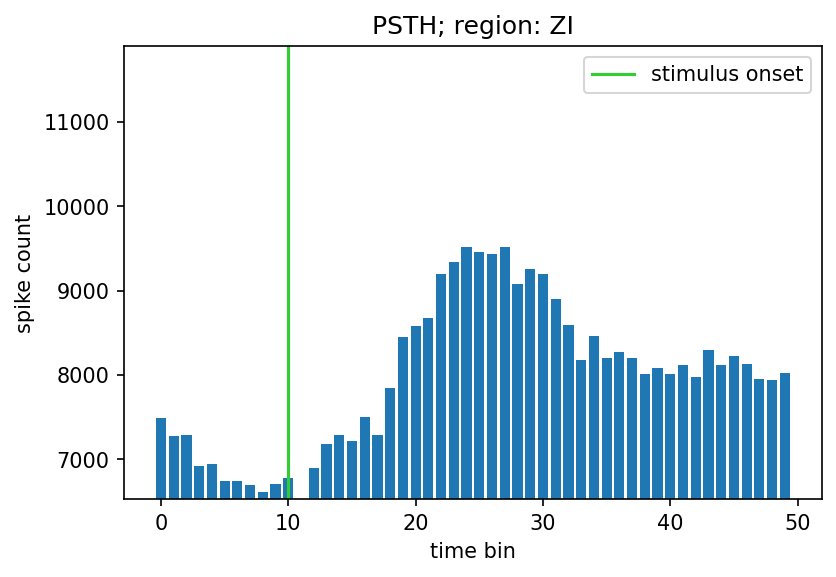

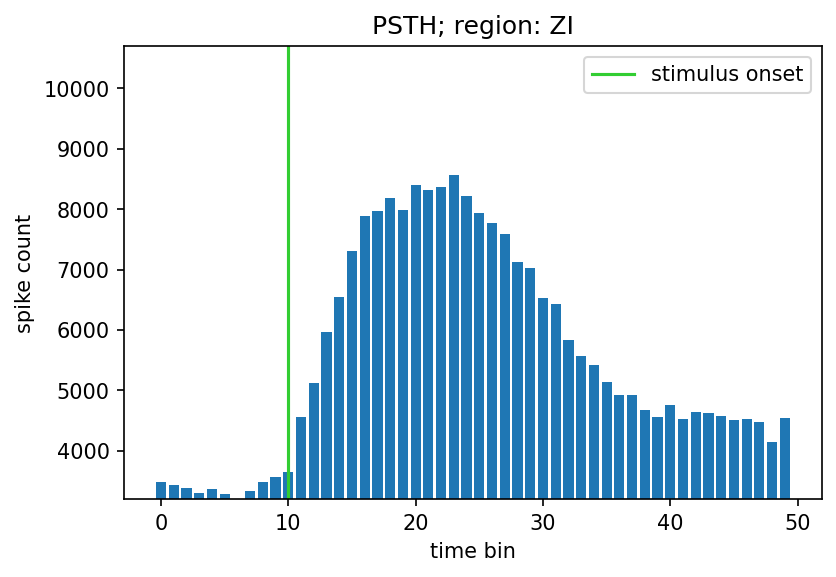

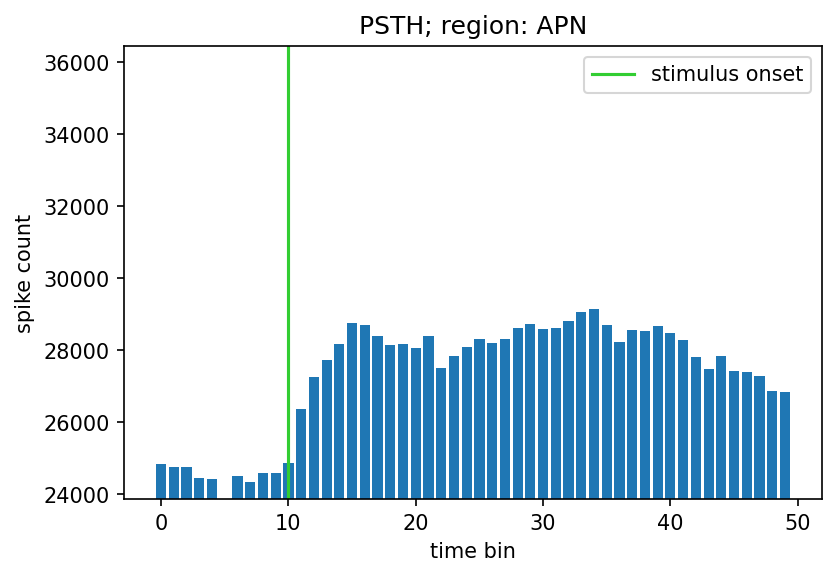

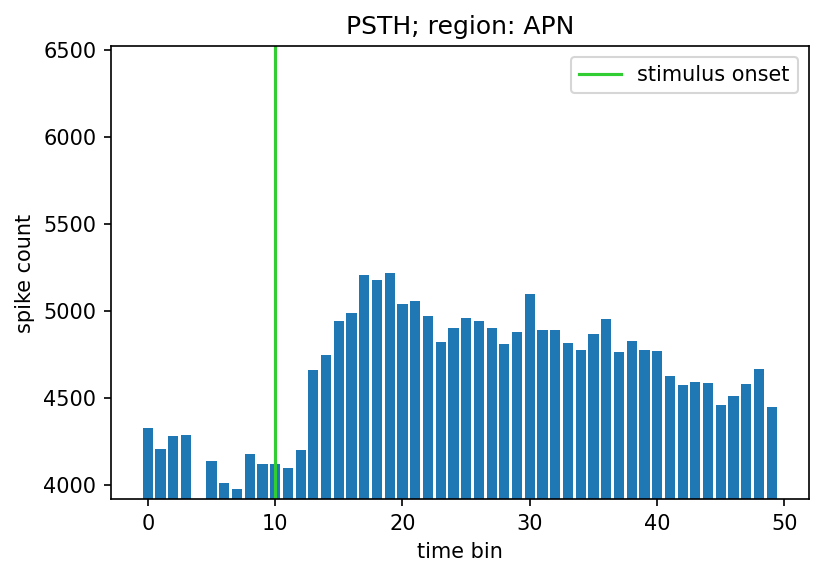

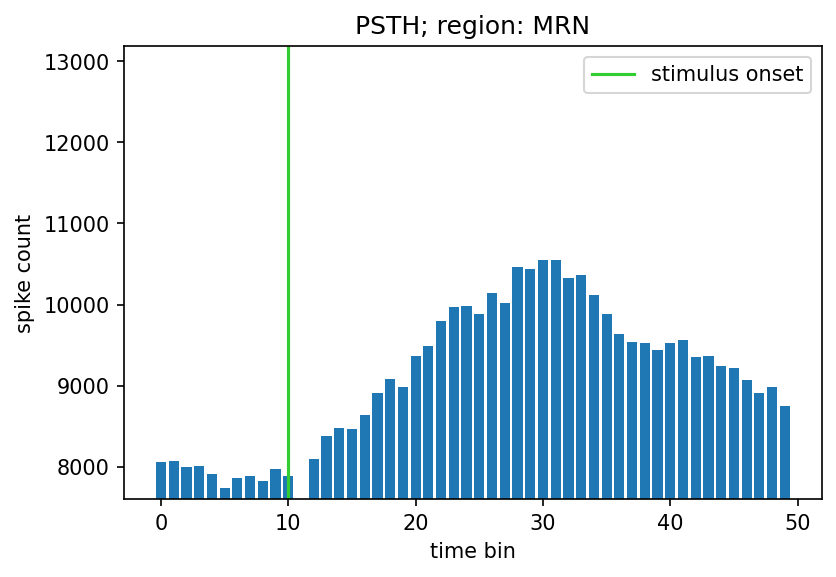

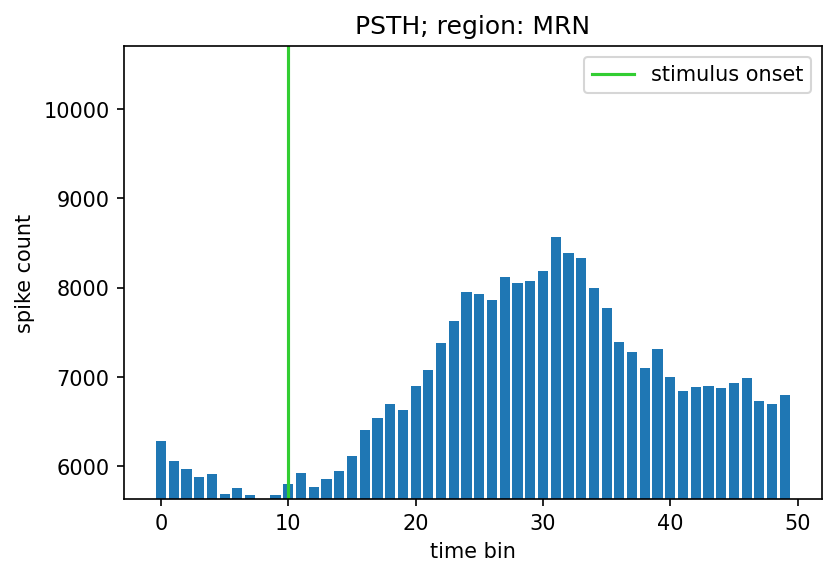

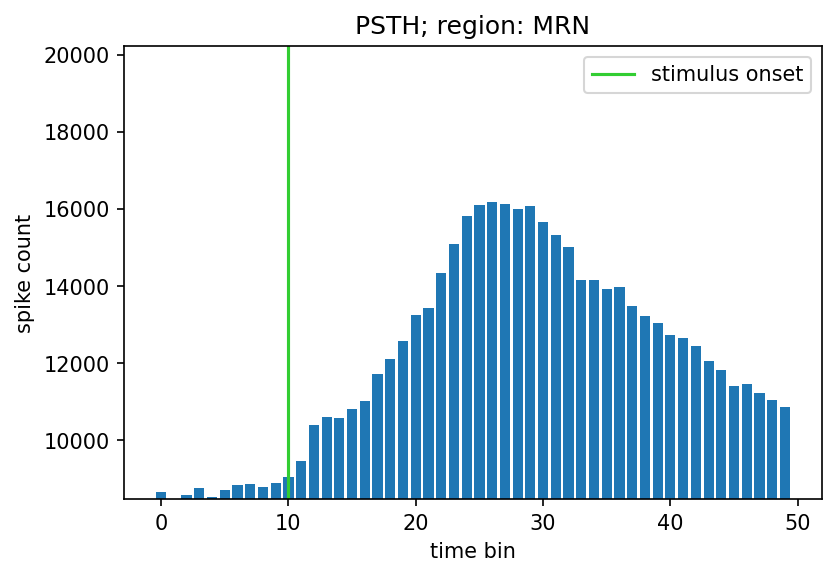

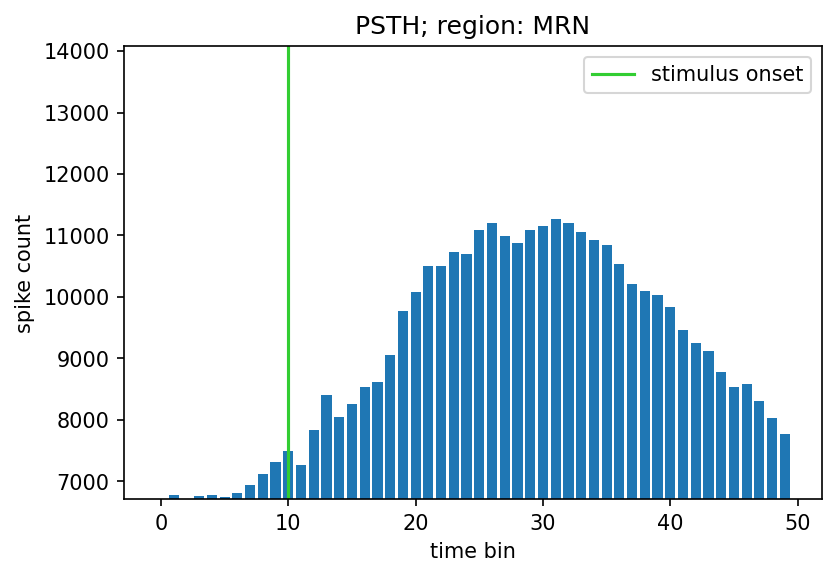

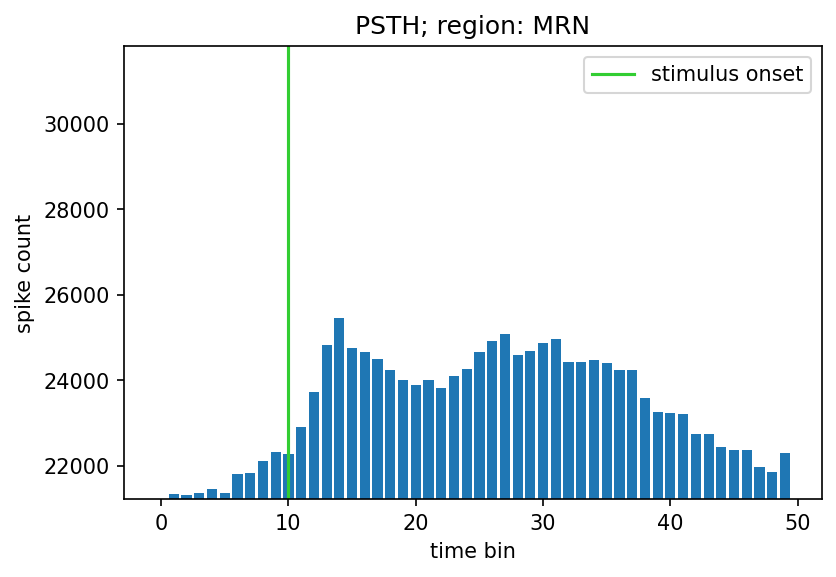

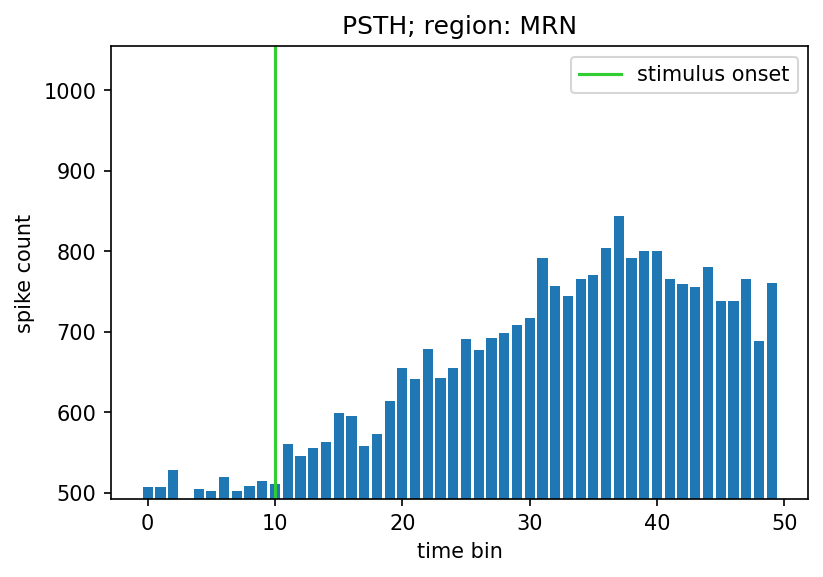

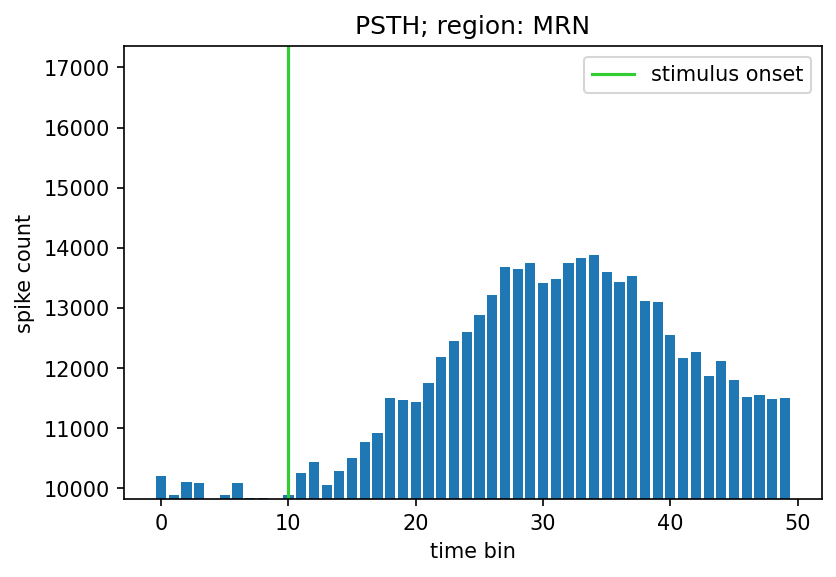

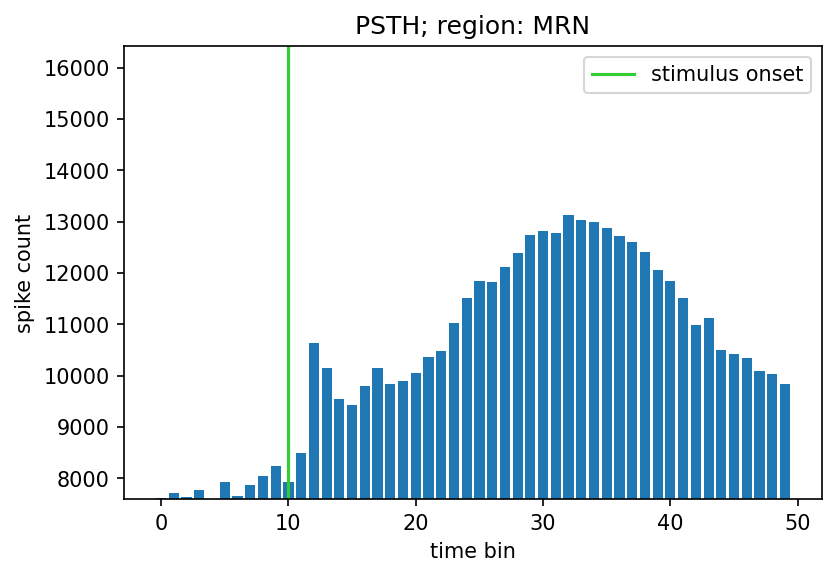

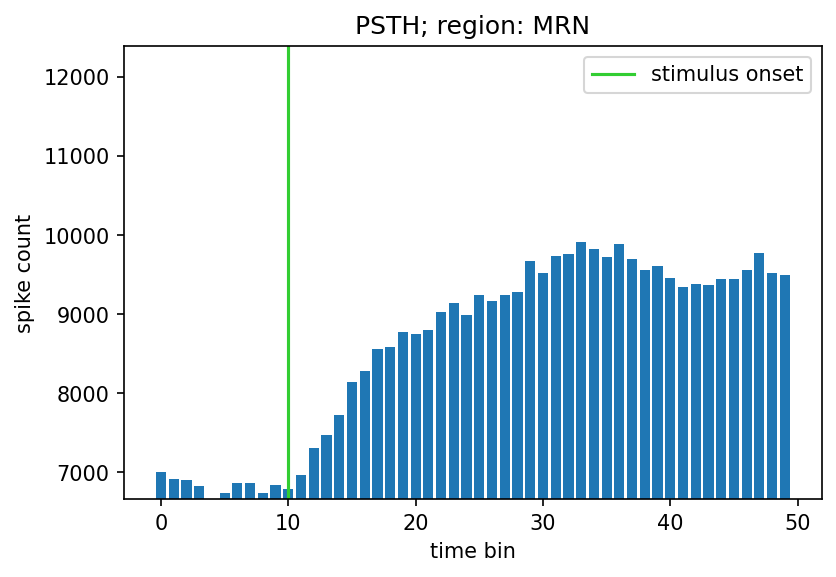

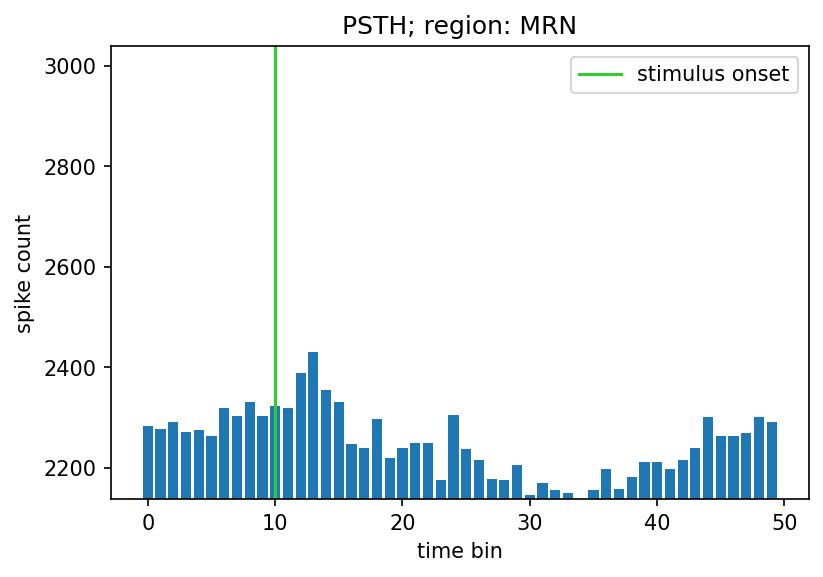

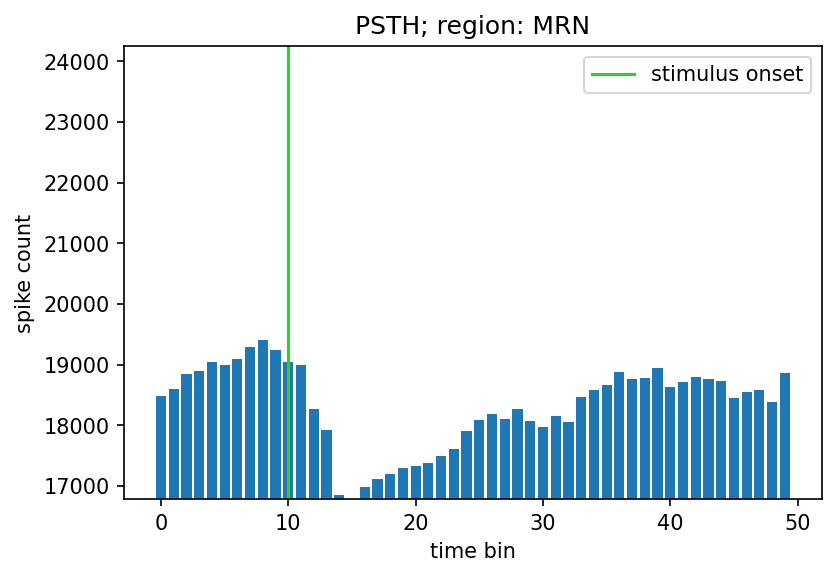

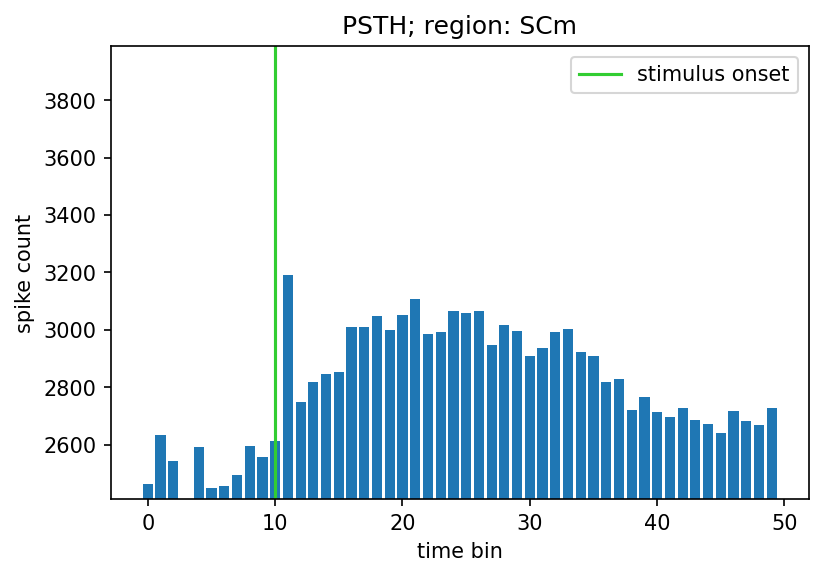

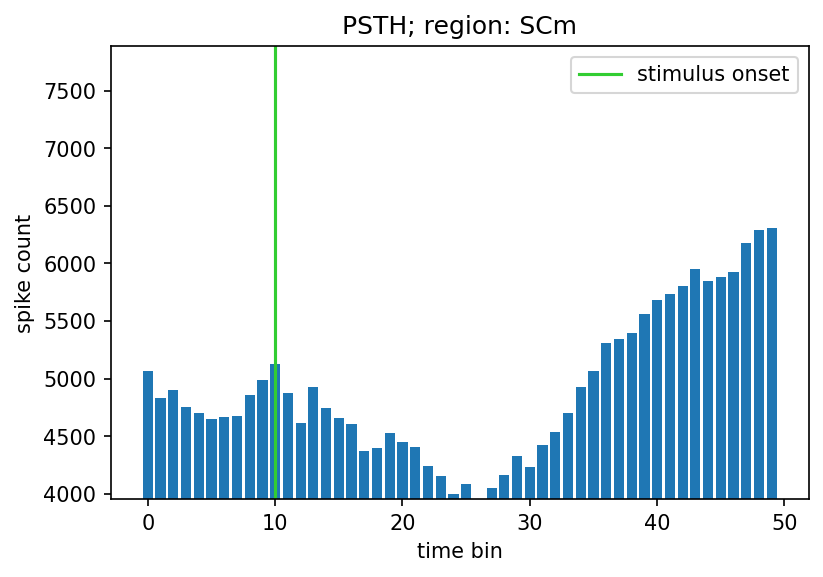

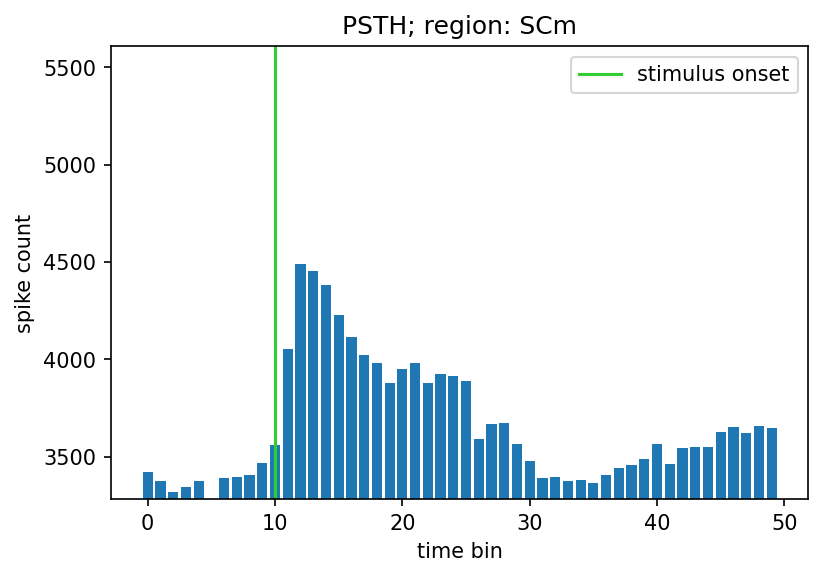

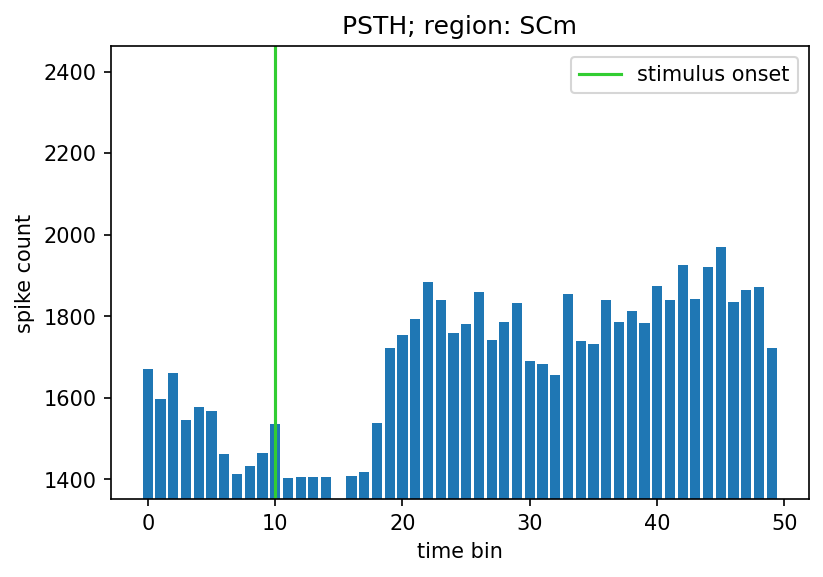

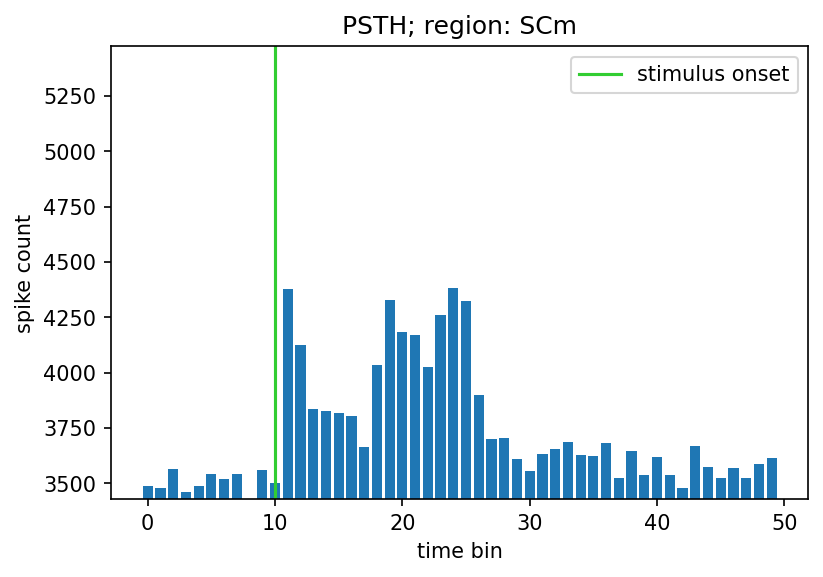

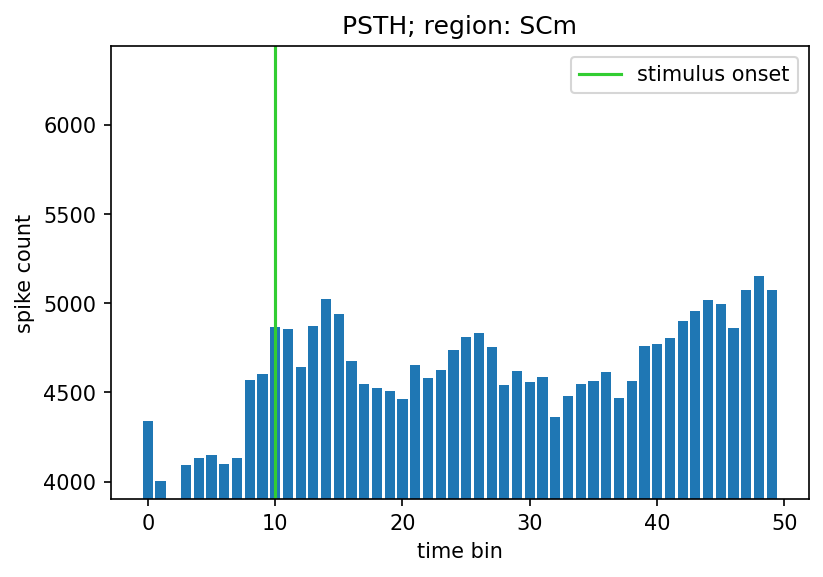

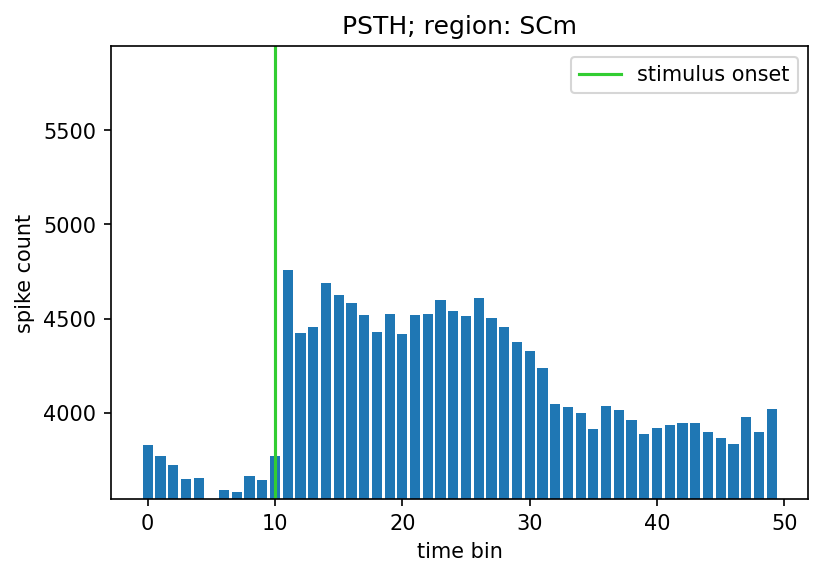

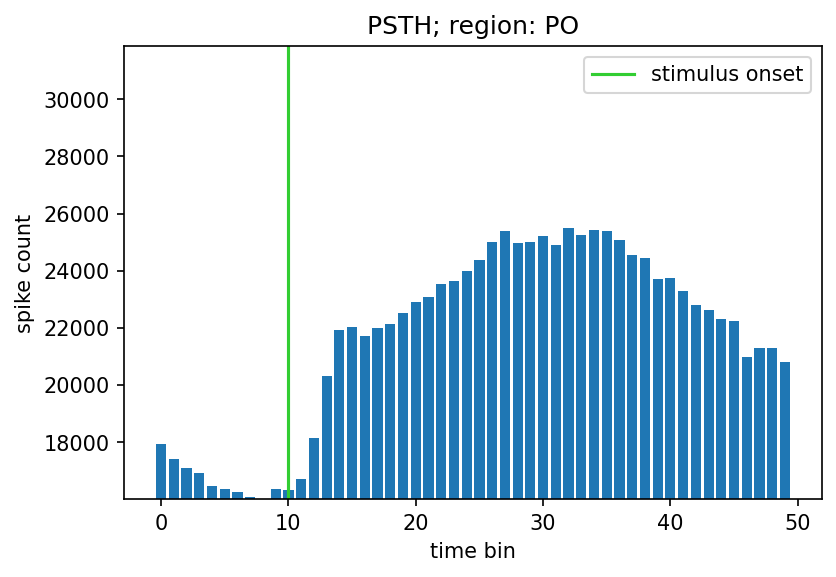

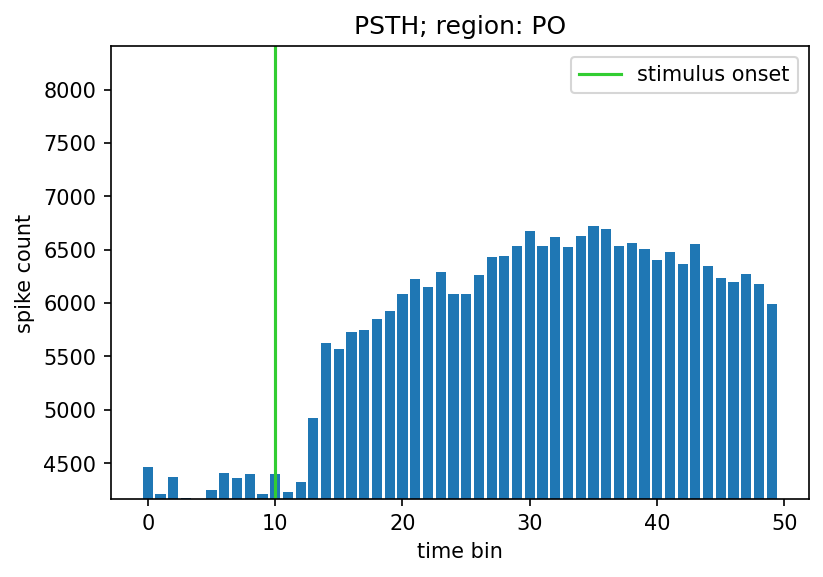

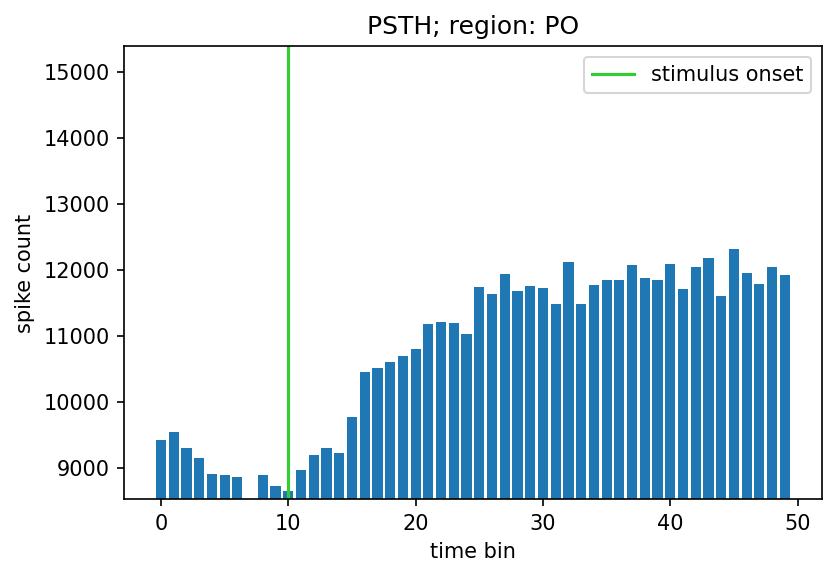

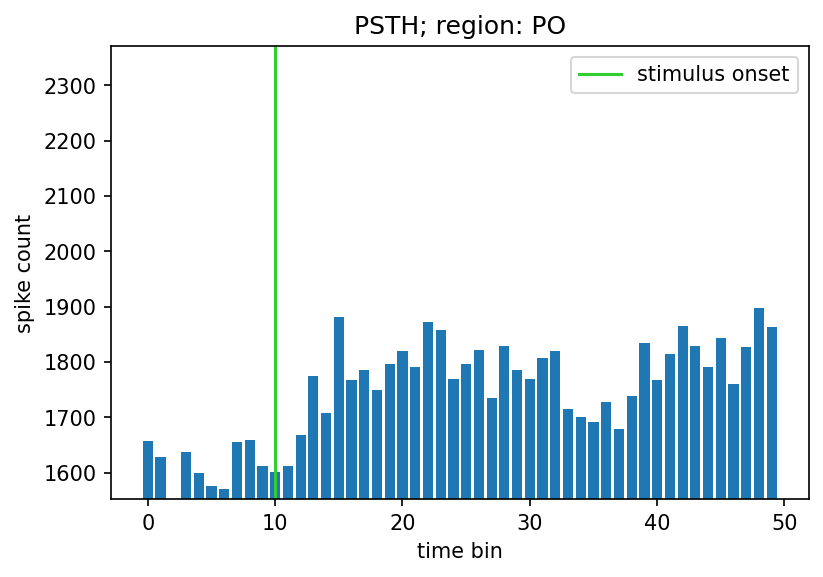

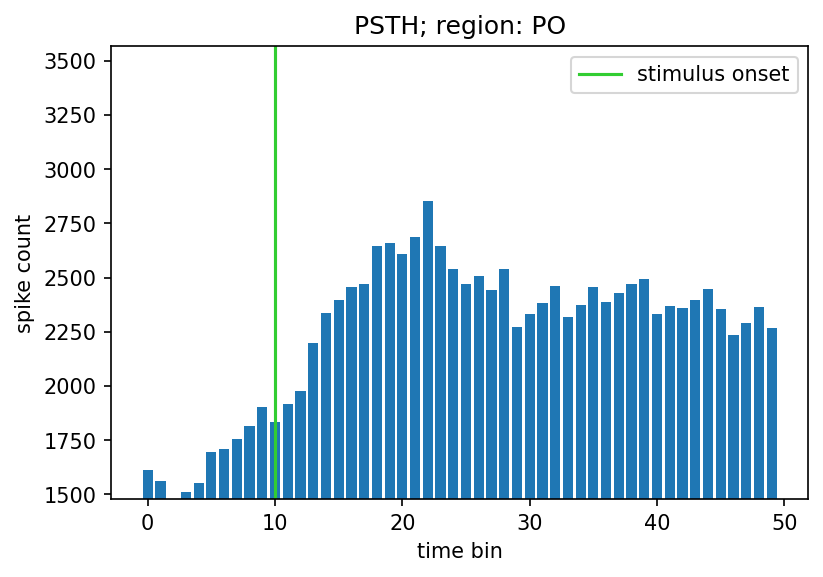

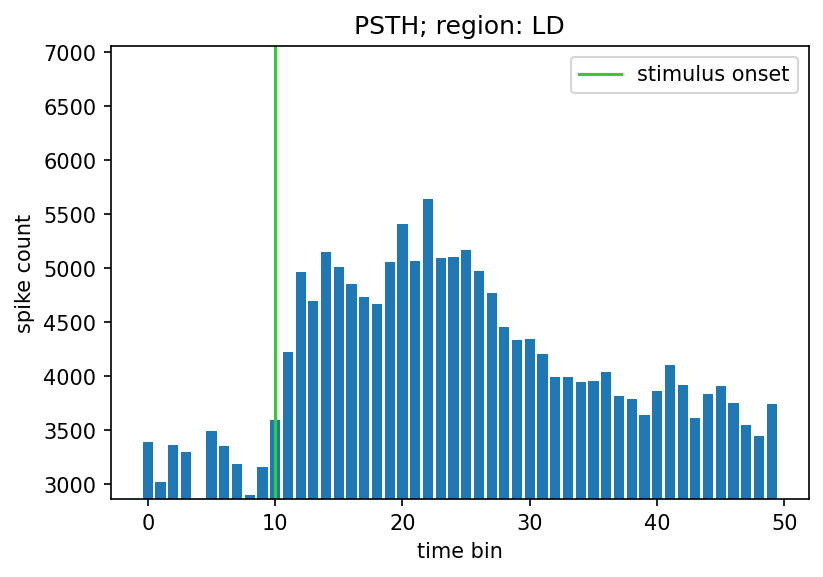

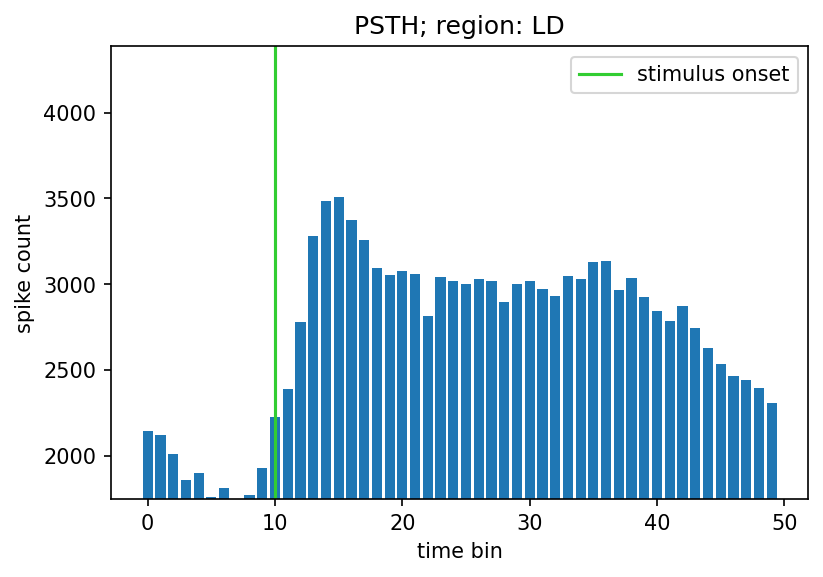

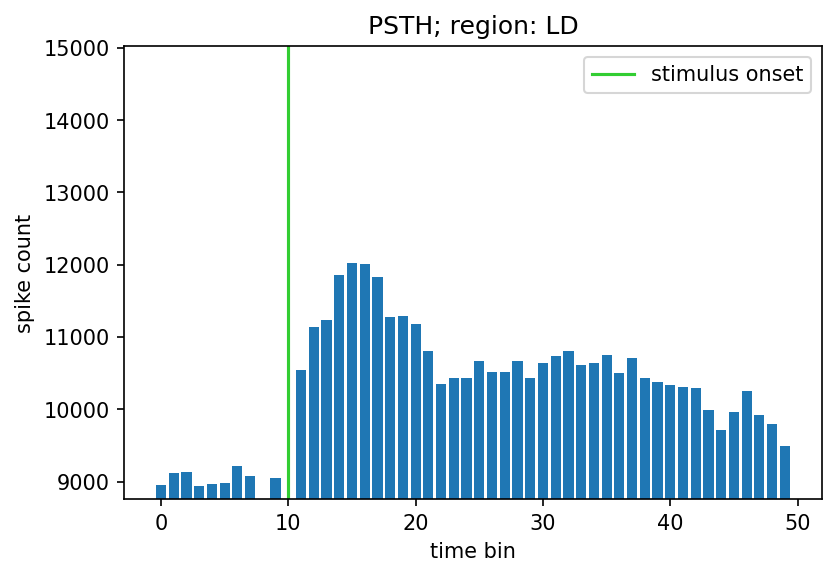

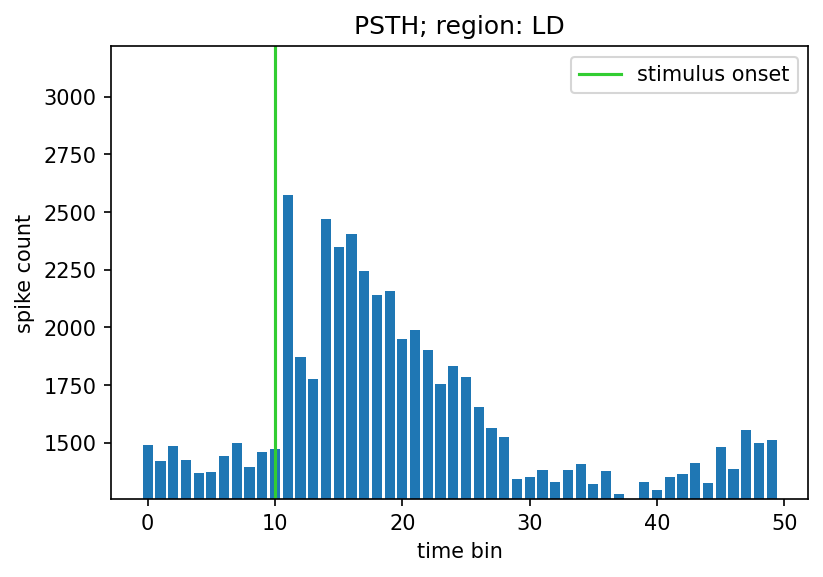

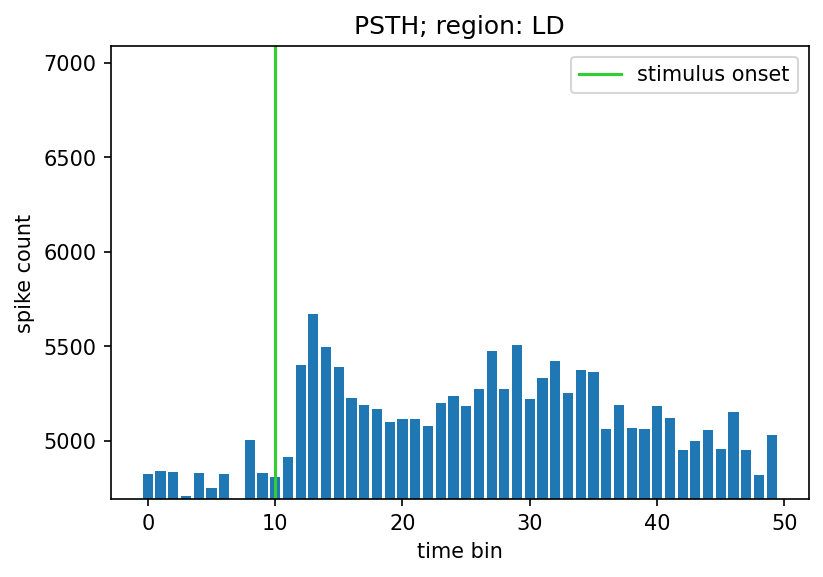

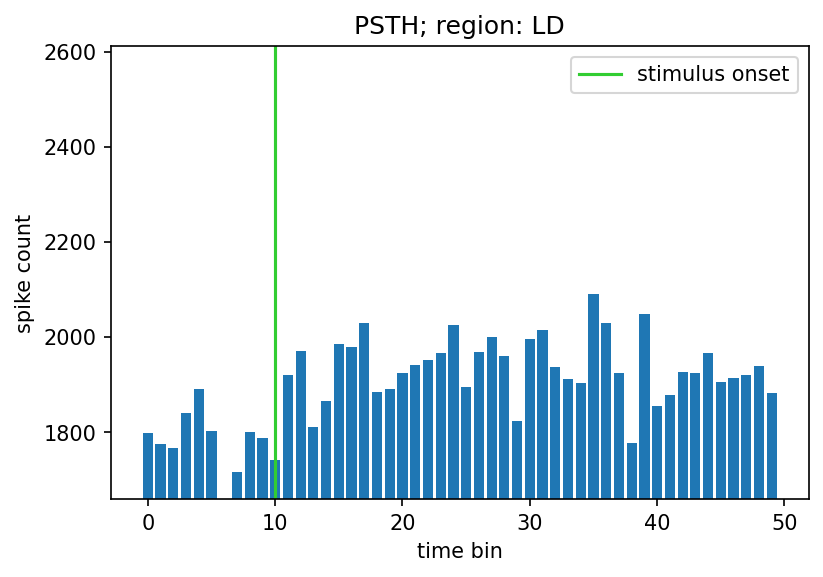

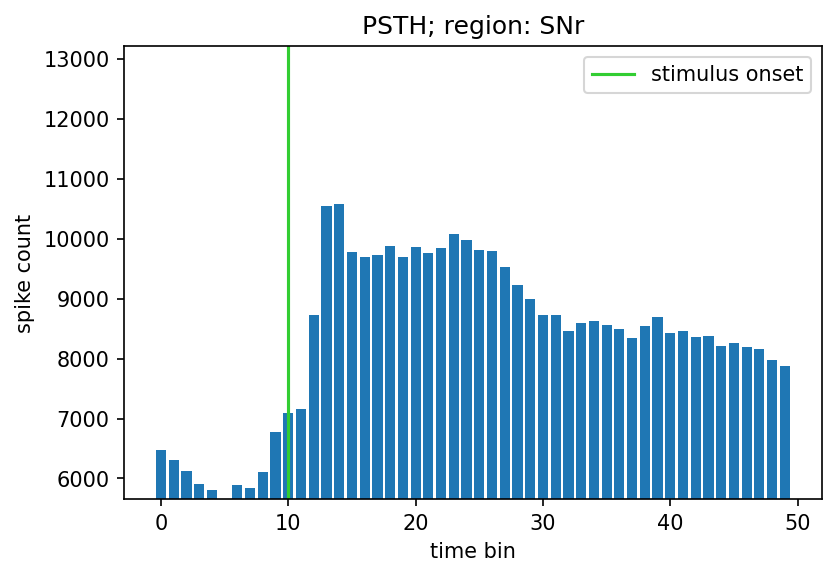

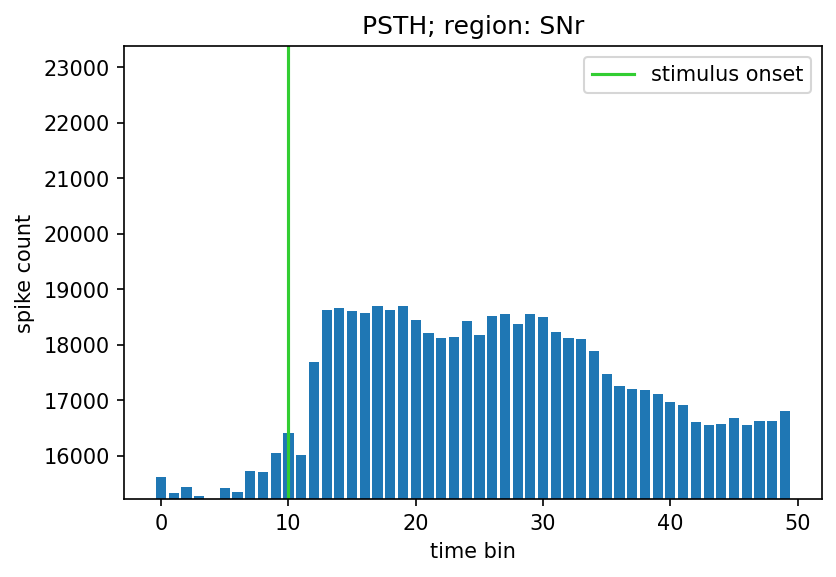

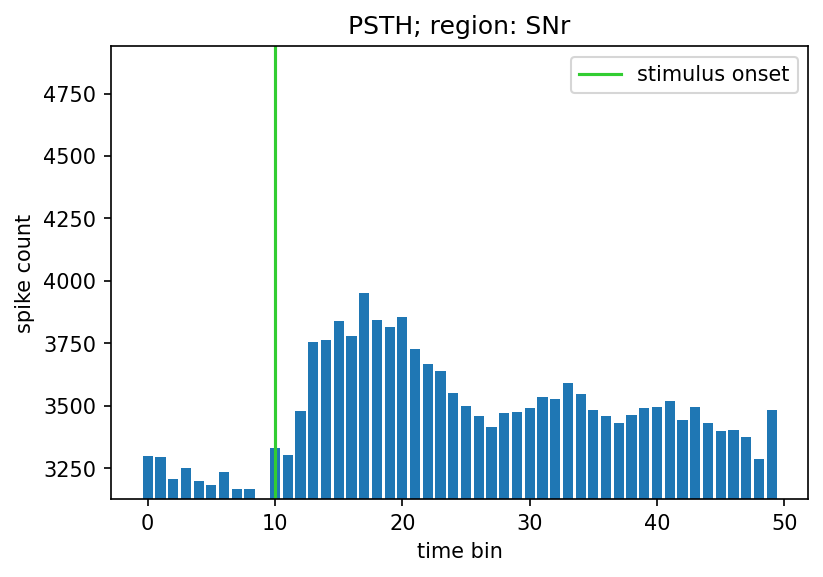

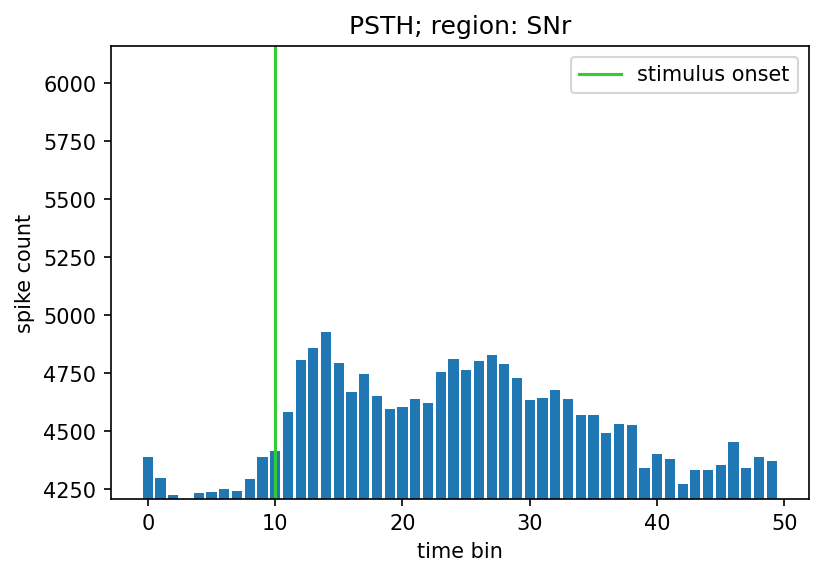

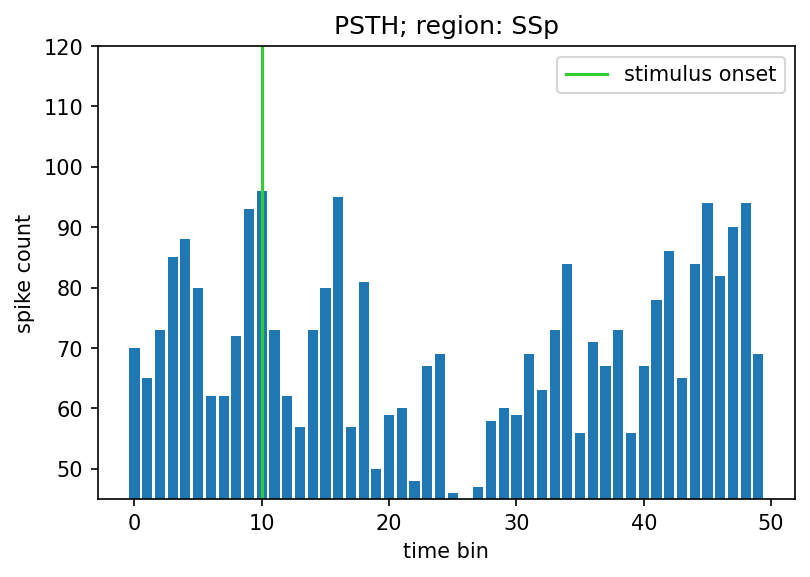

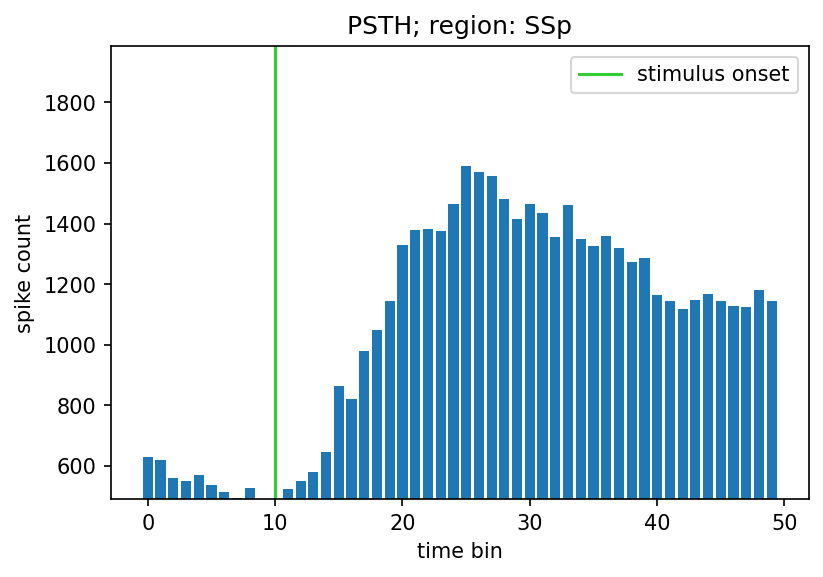

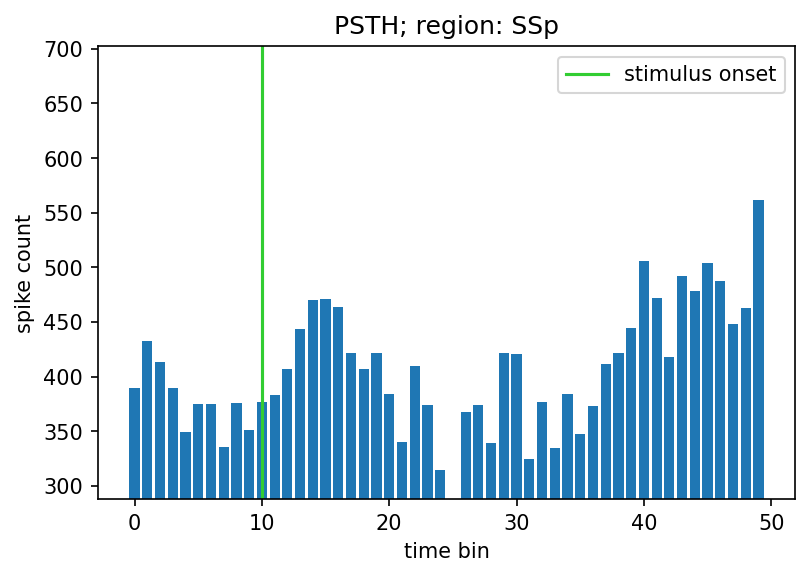

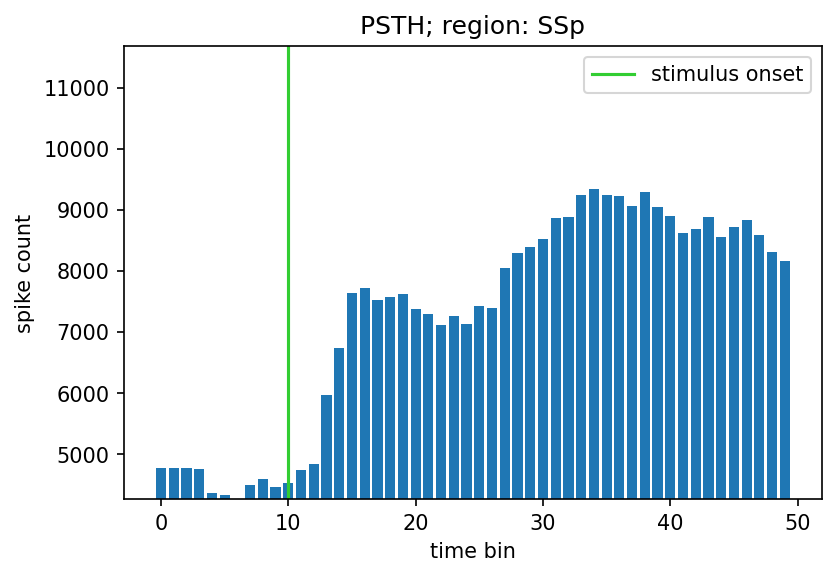

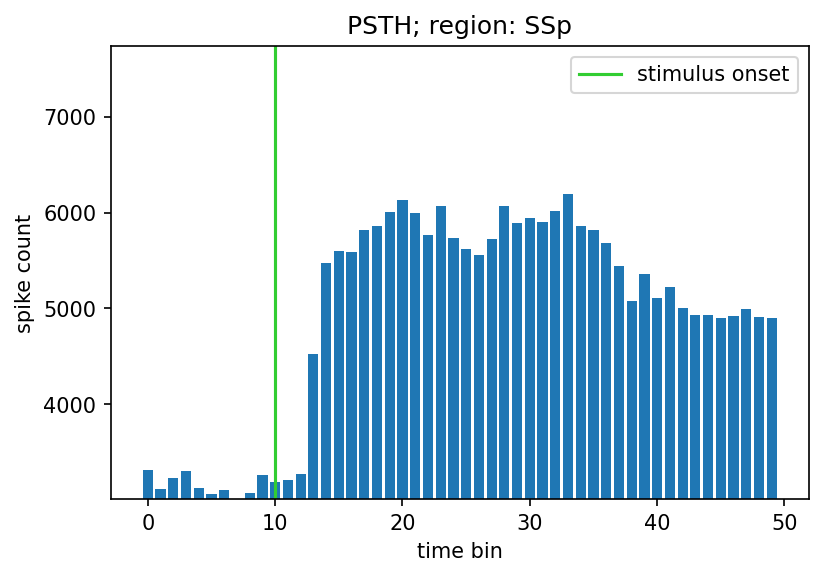

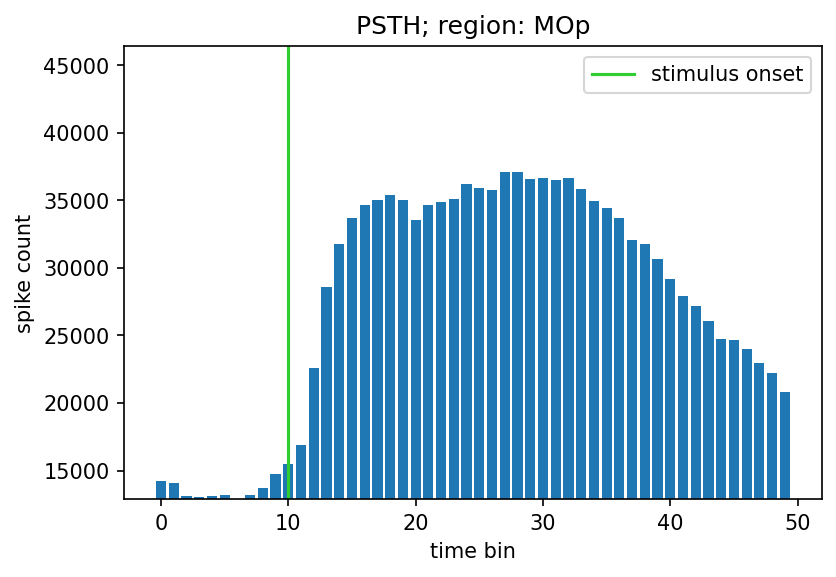

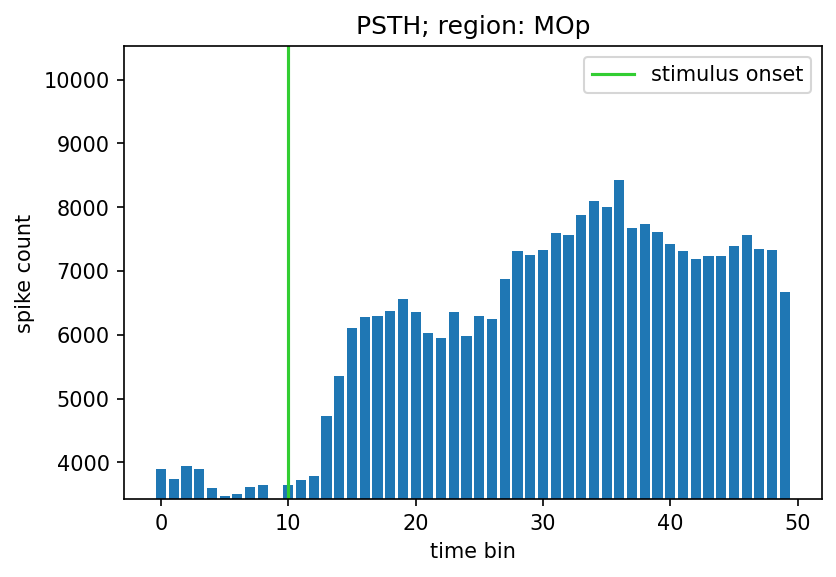

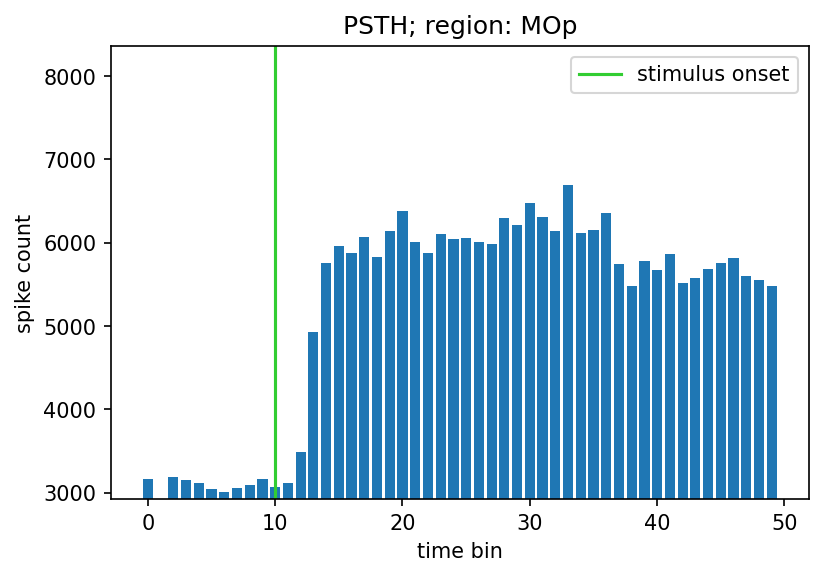

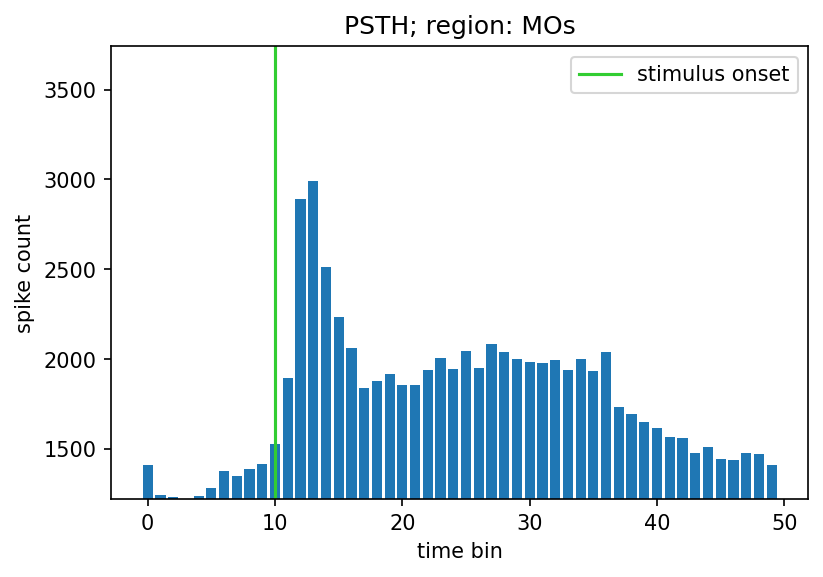

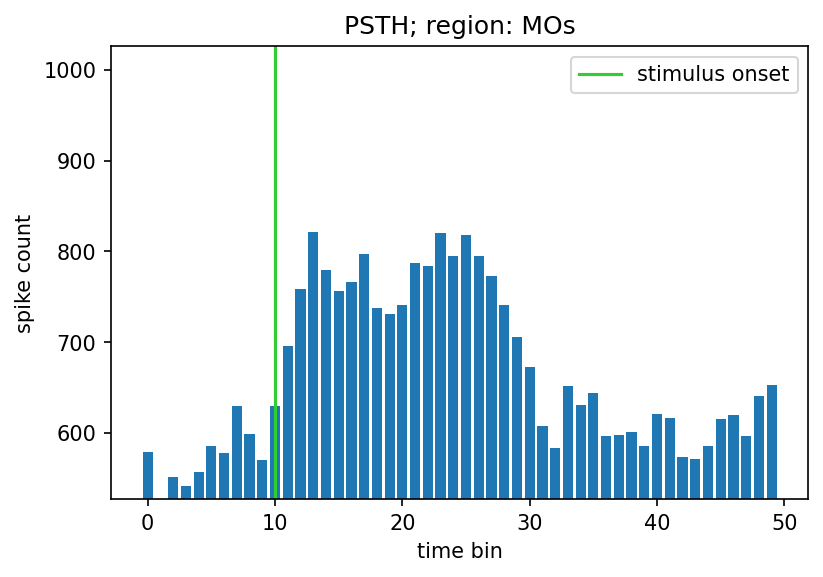

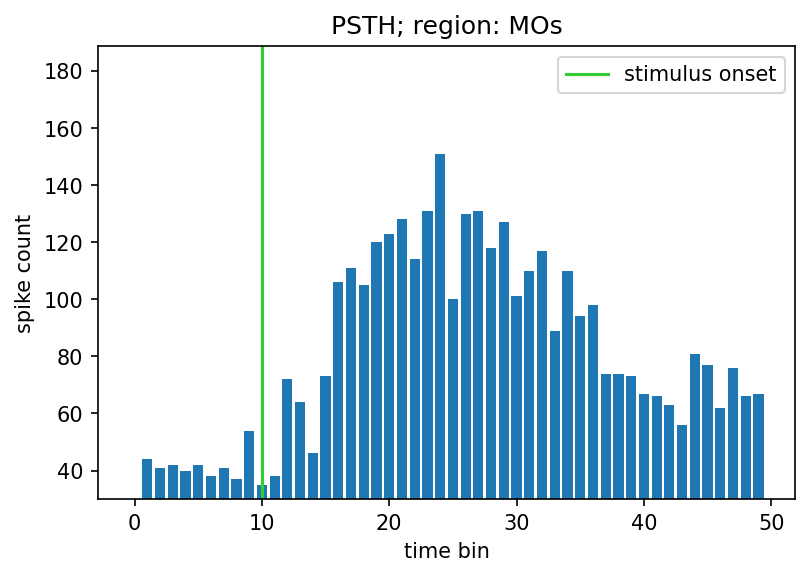

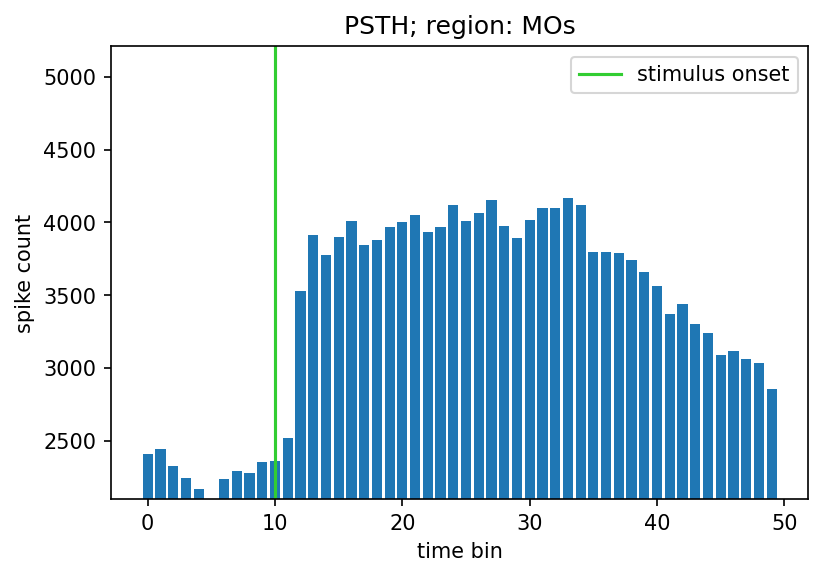

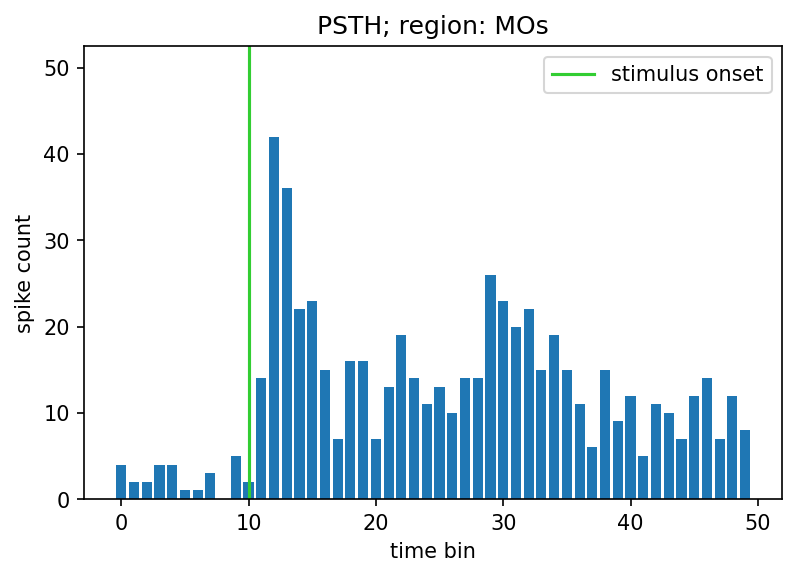

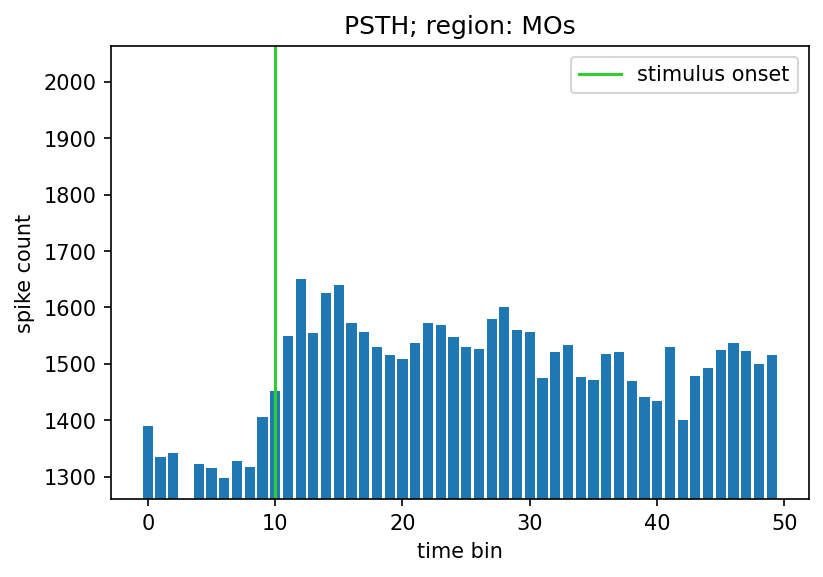

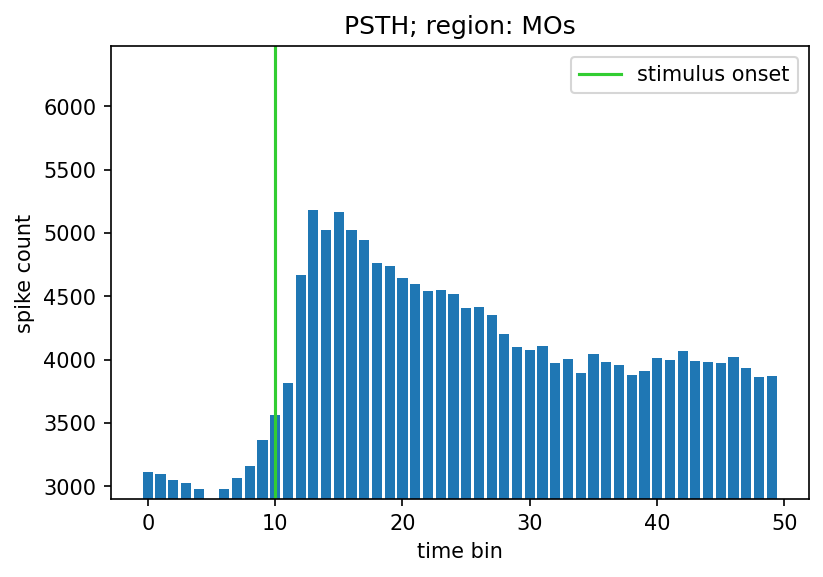

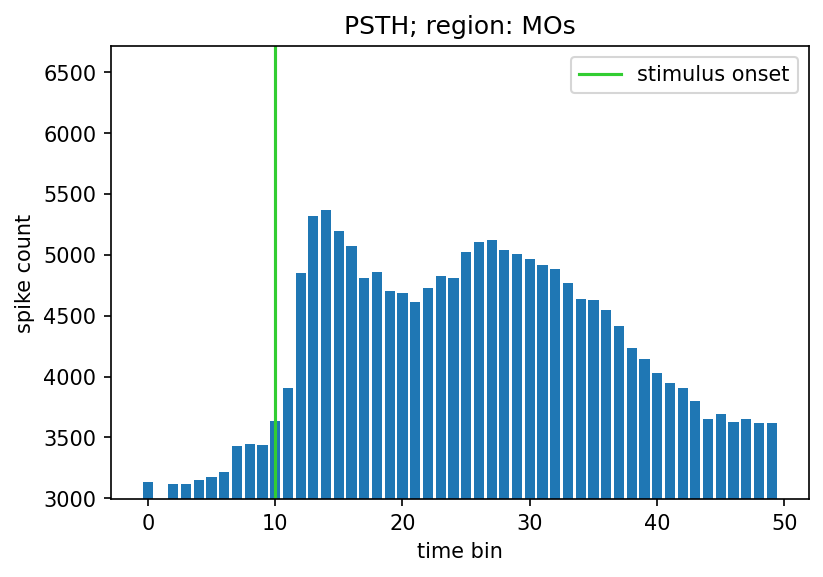

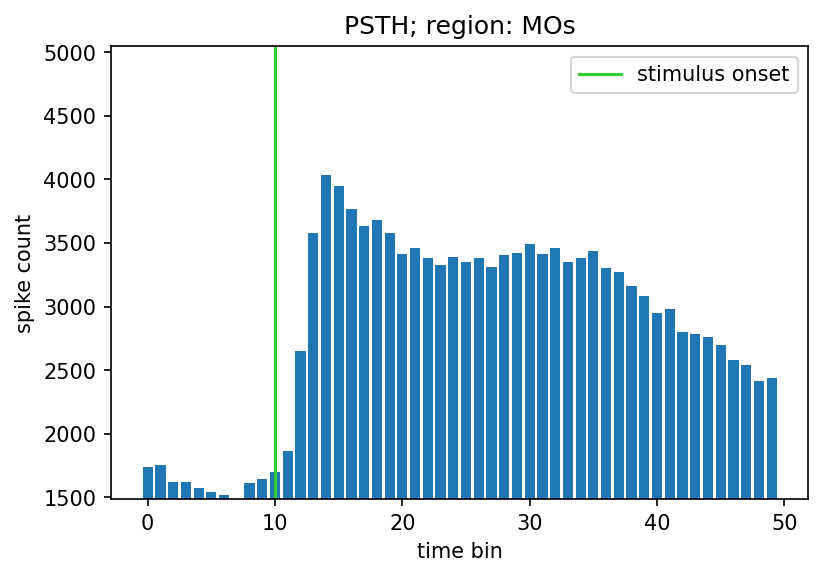

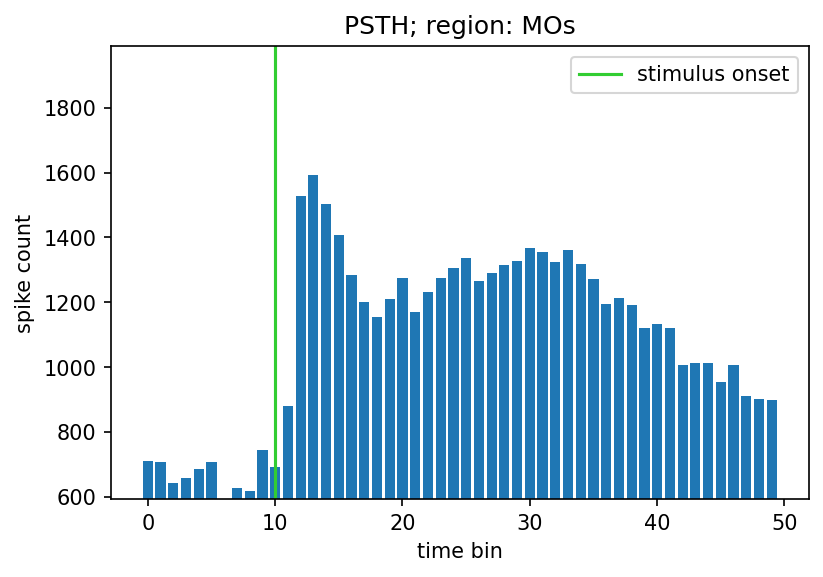

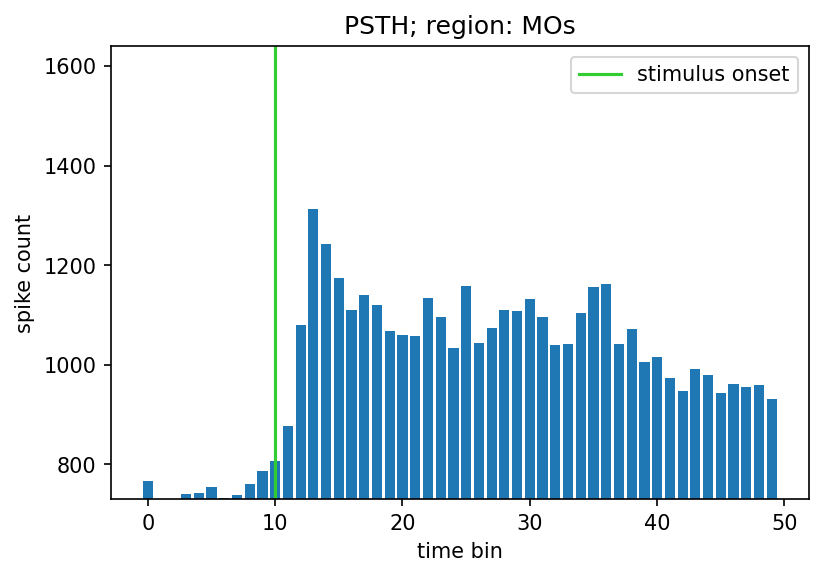

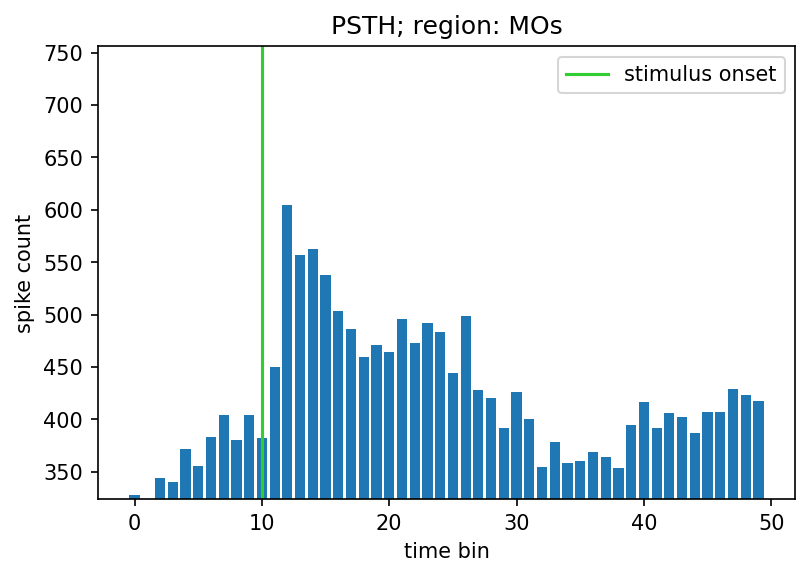

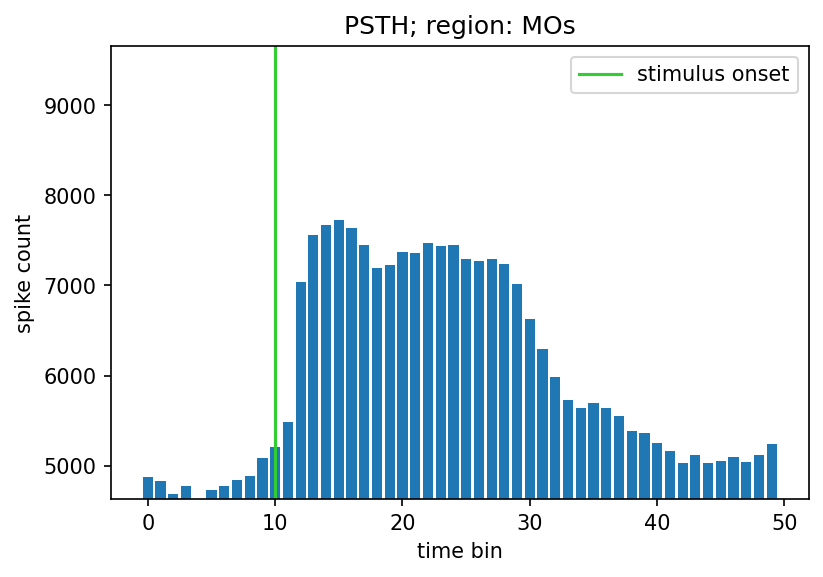

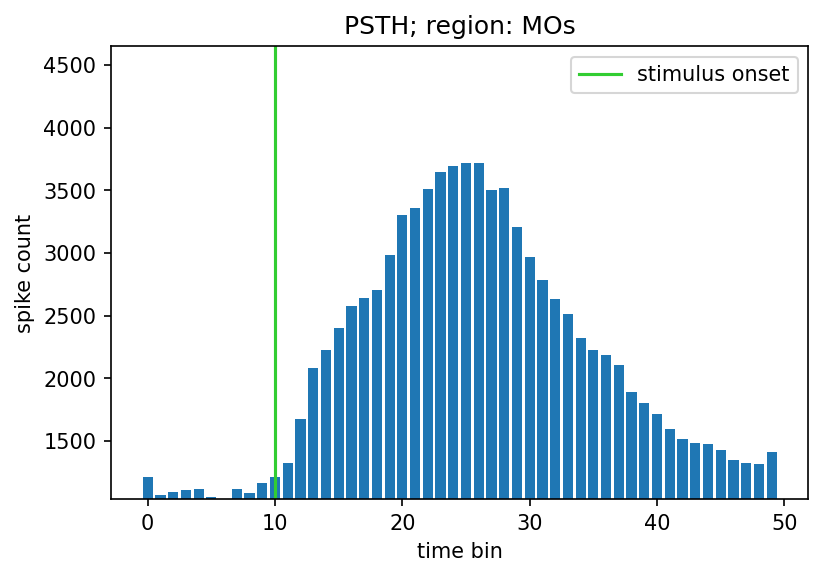

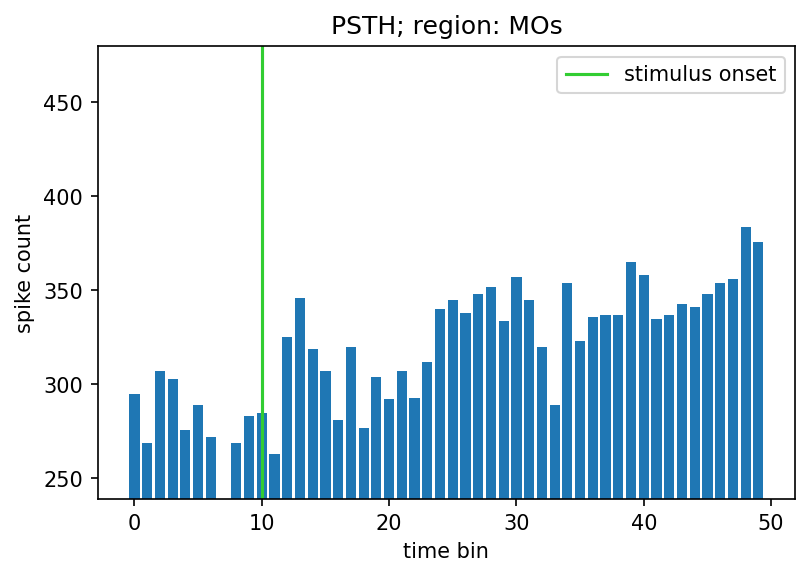

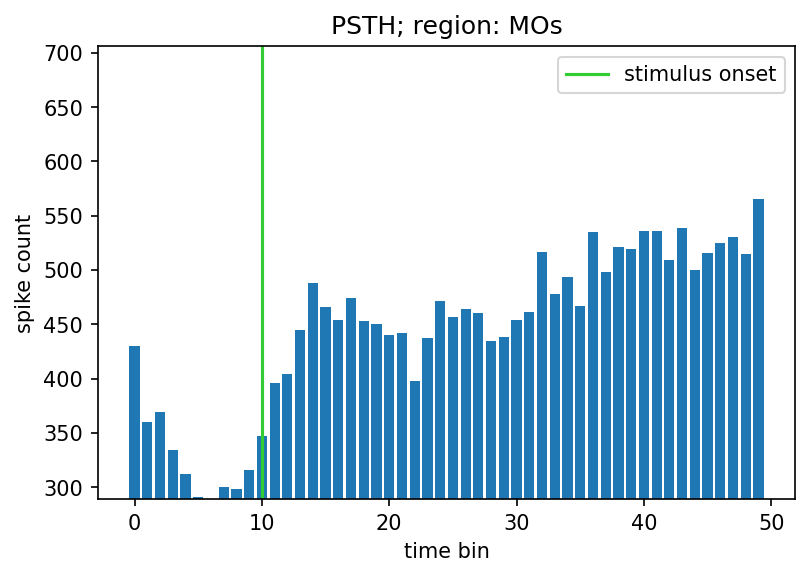

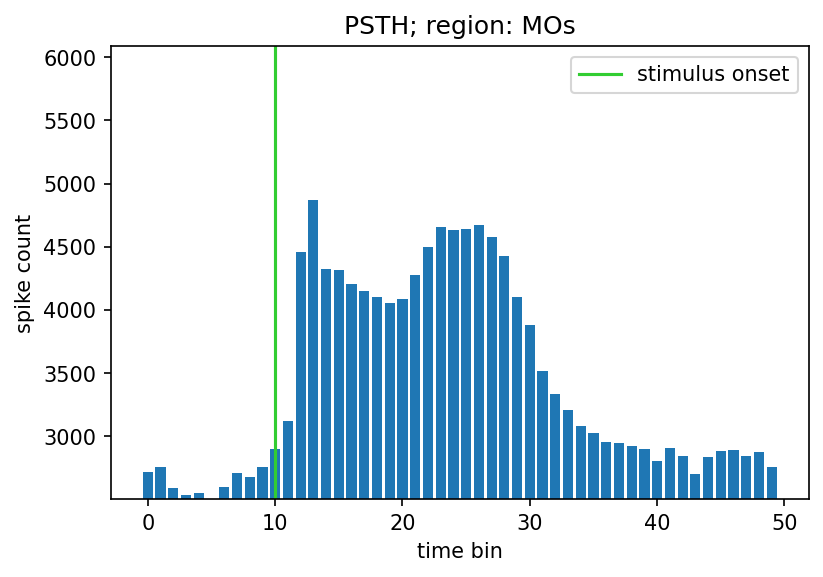

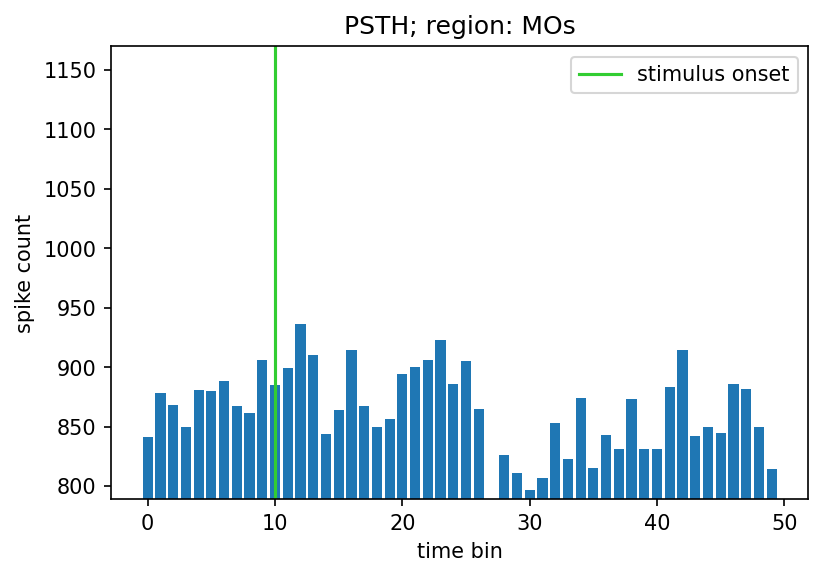

In [7]:
for region in cr_top10:
    for dat in alldat:
        neurons = dat['brain_area'] == region
        neurons_spks = dat['spks'][neurons]
        neurons_count = neurons_spks.shape[0]
        total_neurons_count = dat['spks'].shape[0]
        trials_count = dat['spks'].shape[1]
        if neurons_count > 1:
#             plot_average_activity_neurons_all_trials(neurons_spks, region, sigma=2)
            psth(neurons_spks, region, timebin_size=5)